In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Q3, PCA projection
X = np.array([7,5,8,9,3,3,2,4,7])
X = X.reshape(3,3)
X_mu = X.mean(axis=0)    # average of each column

V = np.array([[-0.84, 0.53, 0.1],
             [0.14,0.39,-0.91],
             [0.52,0.75,0.4]])

x3 = np.array([2,4,7])
x3 = x3 - X_mu

b1 = x3 @ V[:,0]
b2 = x3 @ V[:,1]
print(b1,b2)

3.88 -1.37


rho:	 [0.93935997 0.05571822 0.00332071 0.0016011 ]
cumsum:	 [0.93935997 0.99507819 0.9983989  1.        ]
0.9442817831455644


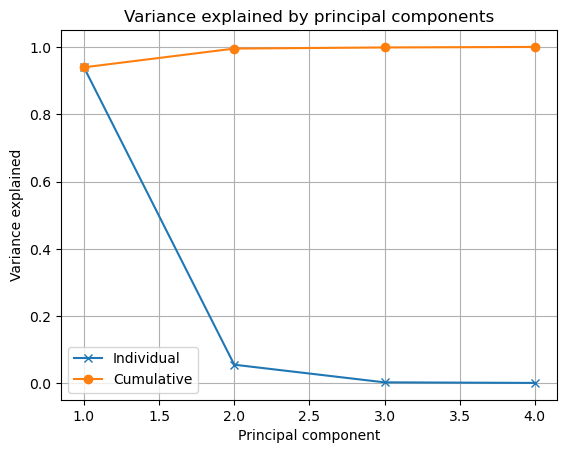

In [3]:
## Q4
# S: sigma, not squared
# S = np.array([49.8364,3.2358,2.9631,2.0575])
S = np.array([49.8364,12.1375,2.9631,2.0575])

# rho: variance explained by each PC
rho = (S*S) / (S*S).sum()
print(f'rho:\t {rho}')

# cumulative sum
cumsum = np.cumsum(rho)
print(f'cumsum:\t {cumsum}')

print(1-rho[1])

plt.figure()
plt.plot(range(1, len(rho)+1), rho, 'x-')
plt.plot(range(1, len(rho)+1), np.cumsum(rho), 'o-')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual', 'Cumulative'])
plt.grid()
plt.show()

In [4]:
## Q4, orthogonal PC
v1 = np.array([0.5133,0.5109,0.4915,0.4938])
v3 = np.array([0.4679,-0.8066,0.3611,-0.0116])
v4 = np.array([-0.7071,-0.2036,0.4769,0.4808])

# Test for orthogonal
v2 = np.array([0.8180,-0.2276,-0.5273,-0.0336])
print(v2 @ v1)
print(v2 @ v3)
print(v2 @ v4)

v2 = np.array([-0.1327,0.2168,0.6330,-0.7312])
print(v2 @ v1)
print(v2 @ v3)
print(v2 @ v4)

0.027838929999999984
0.37630609
-0.7996926899999999
-0.007298849999999982
9.701000000000848e-05
8.430000000003712e-06


In [5]:
## Q5, decision tree, class error
N = 204+166+197+94

n1 = 204+21+107+80
n2 = N-n1

I_parent = 1 - 204/N
I_left = 1 - 204/n1
I_right = 1 - (166-21)/n2

n1_n = n1/N
n2_n = n2/N

pg1 = I_parent - n1_n*I_left - n2_n*I_right
pg1

0.21936459909228442

In [6]:
## Q5, decision tree, class error
N = 204+166+197+94

n1 = 204+31+128+84    # left branch, x1<3.5
n2 = N-n1             # right branch

I_parent = 1 - 204/N
I_left = 1 - 204/n1
I_right = 1 - (166-31)/n2

n1_n = n1/N
n2_n = n2/N

pg2 = I_parent - n1_n*I_left - n2_n*I_right
pg2

0.2042360060514372

In [7]:
pg1-pg2

0.01512859304084721

In [8]:
n2-135-10-69

0

In [9]:
0.11+0.21+0.2+0.48

1.0

In [10]:
## Q9, naive bayes classifier
p_C1 = 0.63+0.05+0.2+0.48   # should divide by 2?
p_C2 = 0.15+0.17+0.11+0.21

numerator = 0.63 * 0.2 * p_C1
denom = numerator + 0.17 * 0.11 * p_C2
prob = numerator/denom
prob

0.9347181008902077

In [11]:
## Q11
c1_a1_mu = np.array([-0.78,-0.32,-0.69,0.7]).mean()
c1_a2_mu = np.array([-0.9,-0.22,-0.47,0.44]).mean()
c2_a1_mu = np.array([1.61,1.15,1.9,2.04]).mean()
c2_a2_mu = np.array([1.06,0.72,1.75,2.06]).mean()

c1 = np.array([c1_a1_mu,c1_a2_mu])
c2 = np.array([c2_a1_mu,c2_a2_mu])
x = np.array([0.7,0.6])

# Euclidean distance
print(np.linalg.norm(x-c1))
print(np.linalg.norm(x-c2))

1.3165912425654365
1.2596155167351664


In [12]:
## Q12, cv, cross validation, number of models to train
K_inner = 5
K_outer = 6
M = 6+5

n = (K_inner*M+2)*K_outer
n

342

In [13]:
## Q14, bayes theorem
p_C1 = 0
p_C2 = (104-52)/104
p_C3 = (112-28)/112
n4 = 400-124-104-112
p_C4 = (n4-12)/n4

prob = p_C2*104/(p_C1*124+p_C2*104+p_C3*112+p_C4*n4)
prob

0.2826086956521739

In [16]:
## Q15
N = 7+45+6+142
e_LR = (6+45)/N
e_DT = (22+36)/N
print(e_LR, e_DT)

0.255 0.29


In [45]:
## Q17, regularized linear regression

###### 1st Outer Fold #######
X_train = np.array([3,4,3,7,5,2])
y_train = np.array([10,7,10,9,4,1])

# Standardize
std = np.std(X_train, ddof = 1)
mu = np.mean(X_train)
X_train = (X_train-mu)/std

# Add offset
X_train = X_train.reshape(-1,1)
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),1)

# Precompute terms
Xty = X_train.T @ y_train
XtX = X_train.T @ X_train
lambdaI = np.eye(2)*10
lambdaI[0,0] = 0 # remove bias regularization

# Solve for weights
w = np.linalg.solve(XtX+lambdaI,Xty)
w

array([6.83333333, 0.3354102 ])

In [46]:
###### 2nd Outer Fold #######
X_train = np.array([6,8,4,3,4,10])
y_train = np.array([7,6,4,3,5,5])

# Standardize
std = np.std(X_train, ddof = 1)
mu = np.mean(X_train)
X_train = (X_train-mu)/std

# Add offset
X_train = X_train.reshape(-1,1)
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),1)

# Precompute terms
Xty = X_train.T @ y_train
XtX = X_train.T @ X_train
lambdaI = np.eye(2)*0.1
lambdaI[0,0] = 0 # remove bias regularization

# Solve for weights
w = np.linalg.solve(XtX+lambdaI,Xty)
w

array([5.        , 0.72242757])

In [48]:
def draw_ROC_curve(y_hat,y_true):
    """
    Input: y_true values estimated from a 1-dimension observation,
           y_hat values based on class membership
    Output: Jaccard similarity and Rand index.
    """
    
    import matplotlib.pyplot as plt
    
    if len(y_hat)!=len(y_true):
        raise ValueError("y_hat and y_true have different array lengths")
        
    n = len(y_hat)
    n_positive = y_true.count(1)
    n_negative = y_true.count(0)
    print(f'n_positive: {n_positive}, n_negative: {n_negative}')
    
    TPR = [1]
    FPR = [1]
    for i in range(n):
        TP = 0
        FP = 0
        threshold = y_hat[i]
        for j in range(n):
            if y_hat[j] > threshold and y_true[j]==0:
                FP+=1
            if y_hat[j] > threshold and y_true[j]==1:
                TP+=1
        TPR.append(TP/n_positive)
        FPR.append(FP/n_negative)
        
    plt.plot(FPR,TPR)
    plt.grid()
    plt.axis('square')
    plt.show()

n_positive: 3, n_negative: 4


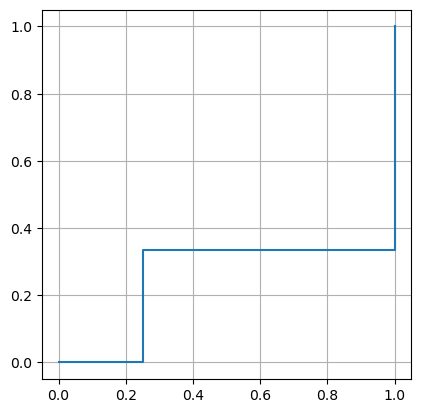

In [50]:
## Q18
y_hat = np.linspace(0,0.8,7)

# Prediction A
y_true = [1,1,0,0,0,1,0]
draw_ROC_curve(y_hat,y_true)

In [73]:
## Q21, linear regression, feature transformation
y_true = np.array([4,7,0,3,1]).reshape(-1,1)
X = np.array([1,4,2,7,3,2,4,9,5,0]).reshape(-1,2)

x1x2 = np.array([4,14,6,4*9,0]).reshape(-1,1)
X = np.concatenate((X,x1x2),1)

w0 = 1
w = np.array([-10,4,2]).reshape(-1,1)

y_hat = w0 + X @ w
temp = 1/5*(abs(y_true-y_hat).sum())
E = 37.6
l = (E - temp)/np.linalg.norm(w, ord=np.inf)
l

0.43999999999999984

In [75]:
## Q22, ANN output
def sigmoid(xw):
    output = 1 / (1 + np.exp(-xw))
    return output

def reLu(xw):
    output = (xw > 0) * xw
    return output

def tanh(xw):
    output = np.tanh(xw)
    return output

w0 = 1.4
w1 = np.array([0,0.3,0.6])
w2 = np.array([1.2,0.4,1.9])
w_list = np.array([w1, w2])
w_out = np.array([-2.4,2.6])

# INPUT LAYER, choose a random point for comparison, add 1 in front
x = np.array([1,0,0])

# HIDDEN LAYER
z = []   # output of hidden units
for weight in w_list:
    xw = x @ weight
    z.append(sigmoid(xw))

# OUTPUT LAYER
f = reLu(np.sum(w_out * z) + w0)
f

2.1981644370974456

In [83]:
## Q23, multivariate normal distribution
from scipy.stats import multivariate_normal

mu_C1 = np.array([0,1])
mu_C2 = np.array([2.15,7.55])
mu_C3 = np.array([0,4.6])
sigma_C1 = np.array([[10,0],[0,0.208]])
sigma_C2 = np.array([[2.51,-1.1],[-1.1,0.6]])
sigma_C3 = np.array([[1.372,0],[0,1.372]])
w1 = 0.2
w2 = 0.4
w3 = 0.4

x = [[0.0,2.0],[1,7],[-1,9],[4.5,1]]
for obs in x:
    pC1 = w1*multivariate_normal.pdf(obs, mu_C1, sigma_C1)
    pC2 = w2*multivariate_normal.pdf(obs, mu_C2, sigma_C2)
    pC3 = w3*multivariate_normal.pdf(obs, mu_C3, sigma_C3)
    p = np.array([pC1,pC2,pC3])
    print(np.argmax(p)+1) # class assigned

3
3
2
1
